In [22]:
import tensorflow as tf
from tensorflow import keras
import onnxruntime as rt
import tf2onnx
from PIL import Image
import numpy as np

In [27]:
model = keras.models.load_model('./App_dash/model_1.h5')
model

In [14]:
spec = (tf.TensorSpec((None, 256, 256, 3), tf.float32, name="input"),)
output_path = model.name + ".onnx"

In [28]:
model.name

'model'

In [16]:
model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec, opset=13, output_path=output_path)
output_names = [n.name for n in model_proto.graph.output]

In [46]:
providers = ['CPUExecutionProvider']
m = rt.InferenceSession(output_path, providers=providers)
# x = np.array(Image.open('./App_streamlit/Images/Places365_val_00005734_1.jpg'))
# x= x/255.


InvalidArgument: [ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Unexpected input data type. Actual: (tensor(double)) , expected: (tensor(float))

In [40]:
x = np.array(Image.open('./App_streamlit/Images/Places365_val_00005734_1.jpg'))
x= x/255.
list = []
list.append(x)

In [44]:
x = np.array(list)
test_predictions = model.predict(x)

b = test_predictions.shape[1:4]
c = test_predictions.reshape(b)
modify = Image.fromarray((c * 255).astype(np.uint8))


pred = 

In [68]:
x = x.astype('float32')
onnx_pred = m.run(output_names, {"input": x})
onnx_pred = np.array(onnx_pred)
onnx_pred

array([[[[[0.39193404, 0.39062524, 0.35268736],
          [0.38314864, 0.3843724 , 0.3049104 ],
          [0.39052367, 0.39416423, 0.30389488],
          ...,
          [0.4470797 , 0.43406382, 0.38059217],
          [0.44564348, 0.4321864 , 0.3928665 ],
          [0.46153754, 0.44708607, 0.41862723]],

         [[0.3582906 , 0.3480177 , 0.2835899 ],
          [0.3454744 , 0.32939643, 0.22784963],
          [0.360146  , 0.3482165 , 0.2343984 ],
          ...,
          [0.4338649 , 0.40272495, 0.3390115 ],
          [0.42560047, 0.39593738, 0.34504572],
          [0.4372156 , 0.41071928, 0.3754121 ]],

         [[0.35982004, 0.3380093 , 0.2649461 ],
          [0.34477112, 0.31339458, 0.21094465],
          [0.36636955, 0.34080252, 0.22250515],
          ...,
          [0.4575994 , 0.4177352 , 0.34094587],
          [0.44579518, 0.4022243 , 0.3397982 ],
          [0.44342127, 0.40818864, 0.3719663 ]],

         ...,

         [[0.24382502, 0.20239502, 0.18109792],
          [0.16275239,

In [66]:
np.allclose(test_predictions, onnx_pred)

False

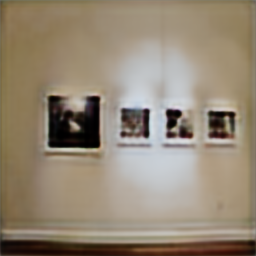

In [78]:
b = onnx_pred.shape[1:4]
# c = onnx_pred.reshape(b)
onnx_modify = Image.fromarray((c * 255).astype(np.uint8))
onnx_modify

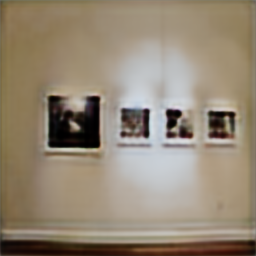

In [76]:
modify

In [79]:
output_path

'model.onnx'

In [82]:
type(model_proto)

onnx.onnx_ml_pb2.ModelProto

In [83]:
import onnx

onnx.save(model_proto, 'model.onnx')

In [84]:
session = rt.InferenceSession('model.onnx')

In [85]:
onnx_pred1 = session.run(output_names, {"input": x})

In [86]:
np.allclose(onnx_pred, onnx_pred1)

True

In [87]:
output_names

['conv2d_6']

In [88]:
x.shape

(1, 256, 256, 3)